<h4>Part 3: Modelling</h4>

<p>1.1 build model with continous models</p>
<p>1.2 polynomial interactions added</p>
<p>1.3 combine with category variables</p>
<p>1.4 Ridge and Lasso models</p>

<p>1.5 Cross validation and Hyper-parameter tuning</p>

In [107]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import lib, data, model
import graphs as gr
 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
df = data.cleanBBData()

X = df.drop(columns=['rent_price','listing_id','description','details_url','first_published_date'])
y = df['rent_price']

run = model.ModelTry(X,y)

In [109]:
## Perform a first naive linear regression model using only Continious Data Variables
lin_con, coef1, X_train, y_train = run.run_model(1, False, False)

Training r^2 %: 52.96
Testing r^2 %: 59.014
Training MSE (mil): 0.39917748568424655
Testing MSE (mil): 0.3578489852403011


In [110]:
## add in the categorical variables
lin_reg, coef2, X_train, y_train = run.run_model(2, False, False)

Training r^2 %: 56.38
Testing r^2 %: 62.002
Training MSE (mil): 0.37015936058276355
Testing MSE (mil): 0.3317614198798117


In [111]:
## add in the polynomial interactions, see effects of overfitting here
lin_poly, coef3, X_train, y_train = run.run_model(2, False, True)

Training r^2 %: 79.172
Testing r^2 %: 70.641
Training MSE (mil): 0.17674486168131762
Testing MSE (mil): 0.25632737615427925


Training r^2 %: 79.742
Testing r^2 %: 72.761
Training MSE (mil): 0.1719116158604828
Testing MSE (mil): 0.23782303022760365


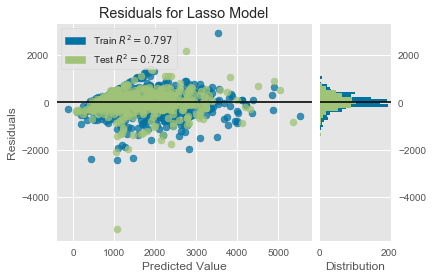

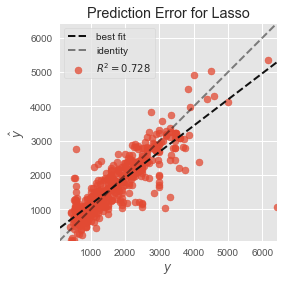

In [112]:
## use Lasso model
las, coef4, X_train, y_train = run.run_model(3, True, True)

In [115]:
## use Ridge model
ridge, coef5, X_train, y_train = run.run_model(4, False, True)

Training r^2 %: 79.936
Testing r^2 %: 72.537
Training MSE (mil): 0.17026000560001991
Testing MSE (mil): 0.2397760727595817


In [114]:
coef4.sort_values('coef_abs', ascending=False).head()

,coef_value,coef_abs
num_bathrooms,742.947780,742.947780
property_type_Studio,378.342977,378.342977
latitude num_bathrooms,293.803510,293.803510
latitude outcode,-215.611601,215.611601
latitude longitude,187.105633,187.105633


In [125]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

best_alpha, bmodels = model.grid_search(X_train, y_train, Lasso(), score = 'r2', cv=3)

In [126]:
bmodels.head(5).T

,49,48,50,47,51
mean_fit_time,0.0275467,0.0304973,0.0226766,0.0313559,0.0206895
std_fit_time,0.0107757,0.00928414,0.0106982,0.00715617,0.0102317
mean_score_time,0.00145992,0.00136304,0.00127506,0.00151269,0.00117604
std_score_time,0.000179694,0.000272139,4.99326e-05,0.000184383,8.22505e-05
param_alpha,0.45,0.4,0.5,0.35,0.55
params,{'alpha': 0.4500000000000002},{'alpha': 0.40000000000000036},{'alpha': 0.5},{'alpha': 0.3500000000000001},{'alpha': 0.5500000000000003}
split0_test_score,0.726089,0.726071,0.726127,0.726125,0.726157
split1_test_score,0.703043,0.703088,0.70278,0.702991,0.702432
split2_test_score,0.763415,0.763308,0.763503,0.763168,0.763583
mean_test_score,0.730849,0.730822,0.730803,0.730761,0.730724


Training r^2 %: 79.45
Testing r^2 %: 72.815
Training MSE (mil): 0.17438761423964258
Testing MSE (mil): 0.23734704435148332


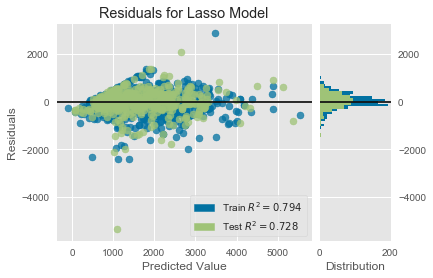

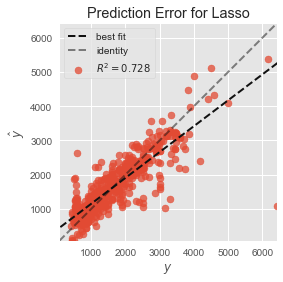

In [124]:
## use Lasso model
las, coef4, X_train, y_train = run.run_model(3, True, True,best_alpha)

<h3>Model Assumption Checking</h3>

1. check residuals are normally distributed

2. scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line)

3. Multicollinearity of Features

In [40]:
# No major multicolinearity issue apart from long and lat, because we only plots two cities

# X_train_all.corr()*100
# abs(df.corr()) > 0.70
pd.DataFrame(np.tril(X.corr().values*100))

,0,1,2,3,4,5,6,7,8,9
0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,-14.126580,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,-4.321721,-15.238848,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,5.295561,17.375921,-88.256768,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,10.841025,16.119957,-10.916990,13.412180,100.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,-8.231471,4.399570,6.784215,-3.929641,38.290139,100.000000,0.000000,0.000000,0.000000,0.0
6,0.827042,20.353749,-8.626246,11.690686,51.303059,17.473006,100.000000,0.000000,0.000000,0.0
7,23.398382,-8.888288,6.368803,-5.103411,-1.355793,-14.010032,-8.834512,100.000000,0.000000,0.0
8,7.172636,-25.115333,2.426963,-4.750238,-8.590180,16.107176,-12.658451,-3.494451,100.000000,0.0
9,-9.860929,16.578065,-2.049915,2.643467,23.720666,11.953887,25.964135,-5.679416,-16.559184,100.0


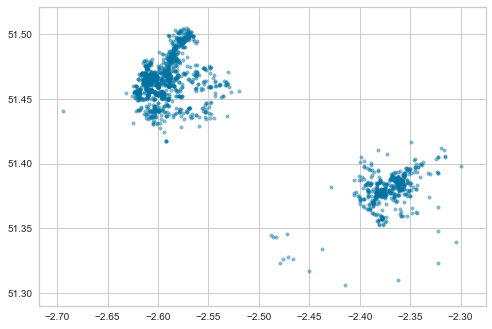

In [43]:
plt.scatter(df.longitude, df.latitude, marker='.', alpha=0.5);